## Handwritten Digit Recognition using Tensorflow

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageOps

In [4]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train,x_test= x_train/255.0, x_test/255.0

In [5]:

model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train, epochs=10, validation_split=0.1)

d:\Tech\Artificial Intelligence\TensorFlow\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8737 - loss: 0.4472 - val_accuracy: 0.9642 - val_loss: 0.1340
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9585 - loss: 0.1370 - val_accuracy: 0.9722 - val_loss: 0.1050
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9754 - loss: 0.0830 - val_accuracy: 0.9760 - val_loss: 0.0819
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9821 - loss: 0.0612 - val_accuracy: 0.9758 - val_loss: 0.0892
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9862 - loss: 0.0461 - val_accuracy: 0.9763 - val_loss: 0.0798
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9889 - loss: 0.0375 - val_accuracy: 0.9782 - val_loss: 0.0808
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9910 - loss: 0.0293 - val_accuracy: 0.9788 - val_loss: 0.0786
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9937 - loss: 0.0216 - 

In [6]:
model.save('model.keras')

In [7]:
# Loading the Model 

model= tf.keras.models.load_model('model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


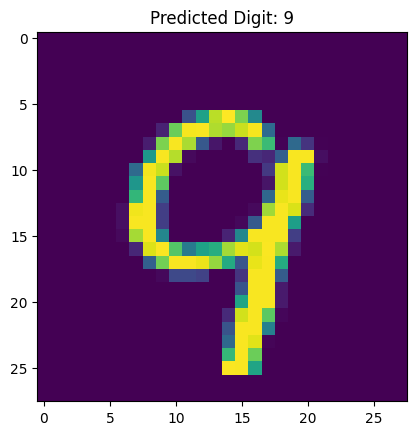

In [8]:
# Predicted test data
predict= model.predict(x_test[16].reshape(1,28,28))

label= np.argmax(predict)

plt.imshow(x_test[16])

plt.title(f'Predicted Digit: {label}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Digit: 6


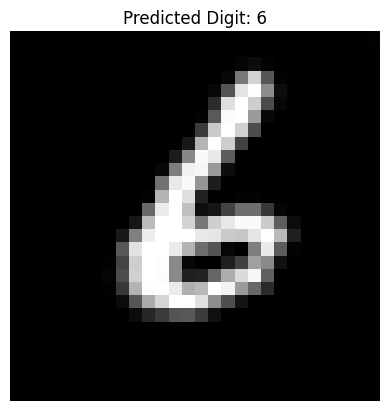

In [18]:
# Predicting own image 

from PIL import Image,ImageOps

img = Image.open('./samples/n6.png').convert("L")  # Convert to grayscale

# Resize to 28x28
img = img.resize((28, 28))
img = ImageOps.invert(img)
img_array = np.array(img) / 255.0

# Reshape for model
img_array = img_array.reshape(1, 28, 28)

# print(img_array)
predictDigit= model.predict(img_array)
label= np.argmax(predictDigit)
print(f'Predicted Digit: {label}')


plt.imshow(img_array.reshape(28,28), cmap='gray')
plt.title(f"Predicted Digit: {label}")
plt.axis('off')
plt.show()

In [19]:
# Showing image from dataset of MNIST

img_arr= x_test[2]

img= Image.fromarray(img_arr)

img= img.resize((2000,2000),Image.NEAREST)

img.show()